## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

# Display the data table for preview
mouse_metadata.head()
study_results.head()
merge_table = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")
merge_table.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [2]:
# Checking the number of mice.
len(study_results["Mouse ID"].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
study_results = study_results.drop_duplicates(subset=["Mouse ID","Timepoint"])
study_results[study_results["Mouse ID"] == "g989"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,0,45.000000,0
329,g989,5,48.786801,0
620,g989,10,51.745156,0
815,g989,15,51.325852,1
950,g989,20,55.326122,1
1195,g989,25,56.045564,1
1380,g989,30,59.082294,1
1592,g989,35,62.570880,2


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merge_table = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")

In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_metadata = mouse_metadata.drop_duplicates(subset=["Mouse ID"])
len(mouse_metadata)

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mean = merge_table.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
mean
median = merge_table.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
median
Variance = merge_table.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
Variance
standard_dev = merge_table.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
standard_err = merge_table.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
sum_data = pd.DataFrame({"Mean":mean,"Median": median, "Variance": Variance, "Standard Deviation": standard_dev, "SEM":standard_err})
sum_data

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

merge_table.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

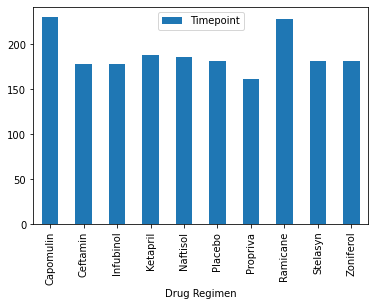

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

count_df = pd.DataFrame(merge_table.groupby(["Drug Regimen"]).count()).reset_index()
count_df
timepoint_df = count_df[["Drug Regimen","Timepoint"]]
timepoint_df = timepoint_df.set_index("Drug Regimen")
timepoint_df.plot(kind = 'bar')
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

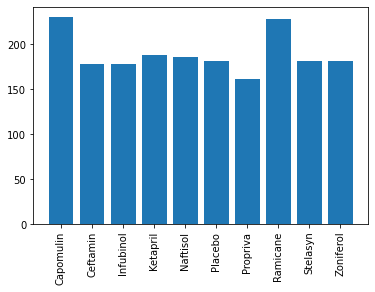

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
y_labels = merge_table.groupby(["Drug Regimen"]).count()['Timepoint'].to_list()
x_labels = list(pd.DataFrame(merge_table.groupby(["Drug Regimen"])["Drug Regimen"])[0])
plt.bar(x_labels,y_labels)
plt.xticks(rotation='vertical')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001B17F09C2B0>],
      dtype=object)

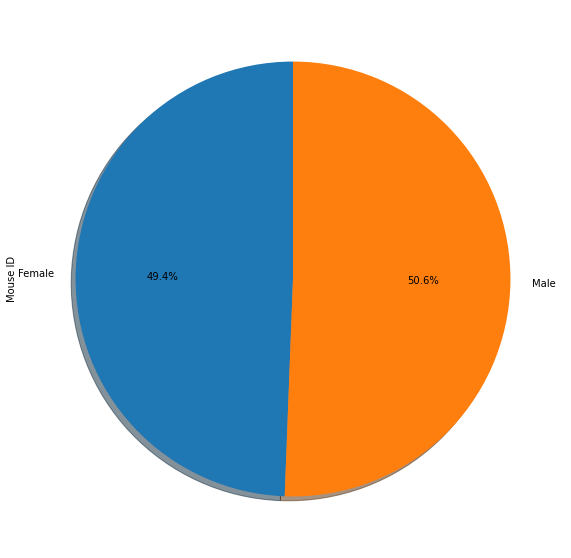

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
merge_table.groupby(['Sex'])["Mouse ID"].count().plot(kind='pie',  subplots=True, shadow = True,startangle=90,figsize=(15,10), autopct='%1.1f%%')





([<matplotlib.patches.Wedge at 0x1b17f129ef0>,
 [Text(0.02099250347258556, 1.0997996703027118, 'Female'),
  Text(-0.020992503472586185, -1.0997996703027118, 'Male')],
 [Text(0.011450456439592123, 0.5998907292560246, '49.4%'),
  Text(-0.011450456439592464, -0.5998907292560246, '50.6%')])

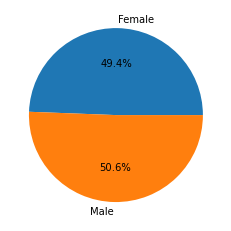

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
values = (merge_table.groupby(['Sex'])["Mouse ID"].count()).tolist()
values
labels = ["Female","Male"]
labels

plt.pie(values, labels=labels, autopct="%1.1f%%")


## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

time45_df = merge_table[merge_table['Timepoint'] == 45]
d_list = ['Capomulin','Ramicane', 'Infubinol','Ceftamin']

time45_df = time45_df[time45_df['Drug Regimen'].isin(d_list)]
time45_df

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1797,x822,Ceftamin,Male,3,29,45,61.386660,3
1813,y163,Infubinol,Female,17,27,45,67.685569,3
1845,y769,Ceftamin,Female,6,27,45,68.594745,4
1855,y865,Ceftamin,Male,23,26,45,64.729837,3


In [19]:
# Put treatments into a list for for loop (and later for plot labels)
d_list = ['Capomulin','Ramicane', 'Infubinol','Ceftamin']


# Create empty list to fill with tumor vol data (for plotting)
tumor_data = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in d_list:

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    temp_df = time45_df[time45_df['Drug Regimen'] == drug]
    Q1 = temp_df['Tumor Volume (mm3)'].quantile(0.25)
    Q3 = temp_df['Tumor Volume (mm3)'].quantile(0.75)
    IQR = Q3 - Q1
    tumor_data.append(IQR)
tumor_data

    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

[7.781863460000004, 7.527130082499998, 4.9311172099999965, 6.093590140000003]

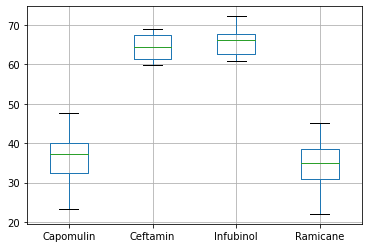

In [23]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
box_df = time45_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].apply(lambda time45_df: time45_df.reset_index(drop=True)).unstack().transpose()
box_df.boxplot()

## Line and Scatter Plots

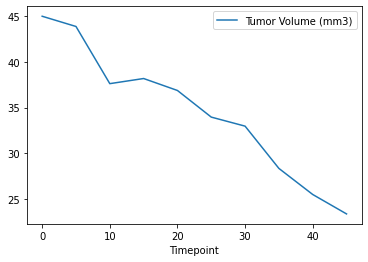

In [28]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cap_df = merge_table[merge_table['Drug Regimen'] == 'Capomulin']
a_mouse = cap_df.iloc[0]["Mouse ID"]
a_mouse_df = cap_df[cap_df['Mouse ID'] == a_mouse]
a_mouse_df
a_mouse_df.plot.line('Timepoint', 'Tumor Volume (mm3)')


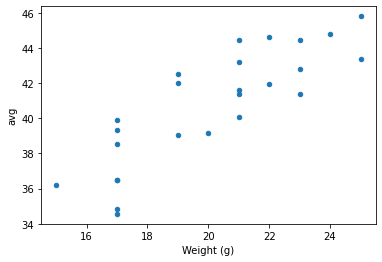

In [32]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg = cap_df.groupby("Mouse ID")['Tumor Volume (mm3)'].mean()
weight = cap_df.groupby("Mouse ID")['Weight (g)'].min()
temp = pd.DataFrame(weight)
temp['avg'] = avg
temp
temp.plot.scatter('Weight (g)','avg')


## Correlation and Regression

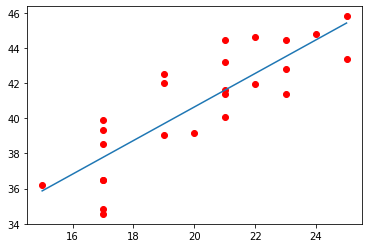

In [38]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
gradient, intercept, r_value, p_value, std_err = st.linregress(temp['Weight (g)'],temp['avg'])
w_list = []
t_list = []
t_list.append(15 * gradient + intercept)
w_list.append(15)
for i in range(3, 5):
    t_list.append((i+1)*5*gradient + intercept)
    w_list.append((i+1)*5)
plt.plot(w_list,t_list)
plt.scatter(temp['Weight (g)'].tolist(), temp['avg'].tolist(), color='r')

